https://towardsdatascience.com/using-the-strava-api-and-pandas-to-explore-your-activity-data-d94901d9bfde

https://www.strava.com/oauth/authorize?client_id=your_client_id&redirect_uri=http://localhost&response_type=code&scope=activity:read_all

In [1]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
code = "din_kode_her"
client_id = "din client_id her"
client_secret = "din client_secret her"
url = f'https://www.strava.com/oauth/token?client_id={client_id}&client_secret={client_secret}&code={code}&grant_type=authorization_code'
token_data = requests.post(url).json()
access_token = token_data["access_token"]
refresh_token = token_data["refresh_token"]

KeyError: 'access_token'

In [2]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

print("Access Token = {}\n".format(access_token))

header = {'Authorization': 'Bearer ' + access_token}
param = {'per_page': 200, 'page': 1}
my_dataset = requests.get(activites_url, headers=header, params=param).json()

NameError: name 'access_token' is not defined

In [3]:
kolsaastoppen = my_dataset[3]
print(kolsaastoppen["name"])
print(kolsaastoppen["map"]["summary_polyline"])

NameError: name 'my_dataset' is not defined

In [13]:
import polyline
coordinates = polyline.decode(kolsaastoppen["map"]["summary_polyline"])
print(len(coordinates))
print(coordinates[:5])

372
[(59.8927, 10.51771), (59.89271, 10.51751), (59.89276, 10.5174), (59.89316, 10.51727), (59.89347, 10.51727)]


In [15]:
x = []
y = []
for coor in coordinates:
    x.append(coor[0])
    y.append(coor[1])

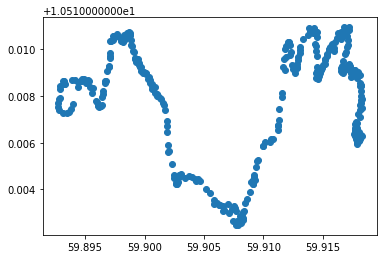

In [16]:
import matplotlib.pyplot as plt

plt.scatter(x,y)

In [19]:
# define function to get elevation data using the open-elevation API
def get_elevation(latitude, longitude):
    base_url = 'https://api.open-elevation.com/api/v1/lookup'
    payload = {'locations': f'{latitude},{longitude}'}
    r = requests.get(base_url, params=payload).json()['results'][0]
    return r['elevation']
# get elevation data
elevation = []
for coor in coordinates:
    elevation.append(get_elevation(coor[0], coor[1]))

[13,
 13,
 13,
 13,
 13,
 13,
 10,
 10,
 10,
 10,
 10,
 10,
 10,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 75,
 75,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 85,
 89,
 89,
 83,
 80,
 80,
 83,
 83,
 80,
 70,
 70,
 70,
 70,
 70,
 70,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 73,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 65,
 69,
 69,
 69,
 69,
 84,
 89,
 89,
 89,
 94,
 94,
 94,
 94,
 94,
 94,
 94,
 145,
 145,
 145,
 145,
 145,
 145,
 145,
 140,
 140,
 145,
 145,
 145,
 145,
 145,
 197,
 197,
 197,
 197,
 197,
 197,
 197,
 197,
 197,
 197,
 197,
 197,
 197,
 208,
 208,
 263,
 263,
 263,
 263,
 263,
 197,
 197,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 263,
 291,
 291,
 291,
 291,
 291,
 291,
 291,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 290,
 

([], [])

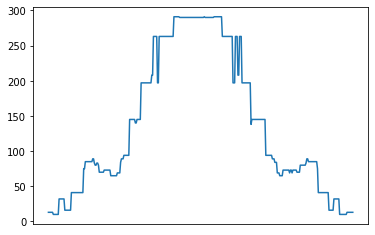

In [26]:
plt.plot(range(len(elevation)), elevation)
plt.xticks([])

In [32]:
delta = kolsaastoppen["elapsed_time"]/len(elevation)

In [34]:
f = open("kolsaastoppen.csv", "w")
f.write("lengde,brede,moh,tid\n")
for i in range(len(x)):
    time = i * delta
    f.write(f'{x[i]},{y[i]},{elevation[i]},{time}\n')
f.close()
